In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_colwidth', -1)
pd.set_option("display.precision",8)

In [2]:
data = pd.read_csv('Data_for_intern_project_1.csv',header=0, parse_dates=[5] )

C:\Users\INTEL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,1,2,3,4,6,7,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,track_record_id,status_code,latitude_gps,longitude_gps,device_id_x,device_time_stamp,asset_type,packet_generating_station_id,track_num1,asset_id_project,project_id,supportsite_id
0,59231753,61441,0,0,1001020218,12/13/2017 0:00,4111,411100000001,0,MPV/27,2,2
1,59231858,61441,0,0,1001020218,12/13/2017 0:01,4111,411100000001,0,MPV/27,2,2
2,59231969,61441,0,0,1001020218,12/13/2017 0:02,4111,411100000001,0,MPV/27,2,2
3,59232069,61441,0,0,1001020218,12/13/2017 0:03,4111,411100000001,0,MPV/27,2,2
4,59232173,61441,0,0,1001020218,12/13/2017 0:04,4111,411100000001,0,MPV/27,2,2


In [4]:
data.isnull().any().any()

False

In [5]:
## lets consider thete are no missing value

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236343 entries, 0 to 236342
Data columns (total 12 columns):
track_record_id                 236343 non-null object
status_code                     236343 non-null object
latitude_gps                    236343 non-null object
longitude_gps                   236343 non-null object
device_id_x                     236343 non-null object
device_time_stamp               236343 non-null object
asset_type                      236343 non-null object
packet_generating_station_id    236343 non-null object
track_num1                      236343 non-null object
asset_id_project                236343 non-null object
project_id                      236343 non-null object
supportsite_id                  236343 non-null object
dtypes: object(12)
memory usage: 21.6+ MB


In [7]:
len(data['track_record_id'][0])

8

In [8]:
## lets calculate the frequency of labels and know what is worng with he data
data.groupby(['track_record_id'])['track_record_id'].count().sort_values(ascending= False).head()

track_record_id
track_record_id    4
59358347           1
59358341           1
59358333           1
59358330           1
Name: track_record_id, dtype: int64

In [189]:
## Lets check the DF where value == ['track_record_id']
repetitive_data = data[data['track_record_id']=='track_record_id']

In [11]:
##Lets drop all the rows having name of the columns

df1 = data.index[data['track_record_id']=='track_record_id'].tolist()

In [12]:
data = data.drop(data.index[df1])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236339 entries, 0 to 236342
Data columns (total 12 columns):
track_record_id                 236339 non-null object
status_code                     236339 non-null object
latitude_gps                    236339 non-null object
longitude_gps                   236339 non-null object
device_id_x                     236339 non-null object
device_time_stamp               236339 non-null object
asset_type                      236339 non-null object
packet_generating_station_id    236339 non-null object
track_num1                      236339 non-null object
asset_id_project                236339 non-null object
project_id                      236339 non-null object
supportsite_id                  236339 non-null object
dtypes: object(12)
memory usage: 23.4+ MB


In [191]:
## Here we see that the no. of rows are reduced

In [192]:
data['device_time_stamp'] = pd.to_datetime(data['device_time_stamp'])

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236339 entries, 0 to 236342
Data columns (total 12 columns):
track_record_id                 236339 non-null object
status_code                     236339 non-null object
latitude_gps                    236339 non-null object
longitude_gps                   236339 non-null object
device_id_x                     236339 non-null object
device_time_stamp               236339 non-null datetime64[ns]
asset_type                      236339 non-null object
packet_generating_station_id    236339 non-null object
track_num1                      236339 non-null object
asset_id_project                236339 non-null object
project_id                      236339 non-null object
supportsite_id                  236339 non-null object
dtypes: datetime64[ns](1), object(11)
memory usage: 33.4+ MB


In [194]:
##

In [195]:
# Change the data to numeric and datetime

In [196]:
newd = data.drop(['asset_id_project', 'device_time_stamp'], axis = 1).apply(pd.to_numeric)

In [197]:
newd['asset_id_project'] = data['asset_id_project']

In [198]:
newd['device_time_stamp']= data['device_time_stamp']

In [199]:
newd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236339 entries, 0 to 236342
Data columns (total 12 columns):
track_record_id                 236339 non-null int64
status_code                     236339 non-null int64
latitude_gps                    236339 non-null float64
longitude_gps                   236339 non-null float64
device_id_x                     236339 non-null int64
asset_type                      236339 non-null int64
packet_generating_station_id    236339 non-null int64
track_num1                      236339 non-null int64
project_id                      236339 non-null int64
supportsite_id                  236339 non-null int64
asset_id_project                236339 non-null object
device_time_stamp               236339 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 33.4+ MB


### EDA

In [21]:
## See number of labels in each variables in given dataframe

for col in newd.columns:
    print('variable', col , '__has number of labels  :  ', newd[col].nunique())
print('total data', len(newd))

variable track_record_id __has number of labels  :   236339
variable status_code __has number of labels  :   4
variable latitude_gps __has number of labels  :   9589
variable longitude_gps __has number of labels  :   9140
variable device_id_x __has number of labels  :   38
variable asset_type __has number of labels  :   17
variable packet_generating_station_id __has number of labels  :   38
variable track_num1 __has number of labels  :   2
variable project_id __has number of labels  :   1
variable supportsite_id __has number of labels  :   2
variable asset_id_project __has number of labels  :   38
variable device_time_stamp __has number of labels  :   7200
total data 236339


In [200]:
## Percent of categorical variable
for col in newd.columns:
    print('variable', col ,'::', round(newd[col].nunique()/len(newd), 6))
print('total data', len(data))

    



variable track_record_id :: 1.0
variable status_code :: 1.7e-05
variable latitude_gps :: 0.040573
variable longitude_gps :: 0.038673
variable device_id_x :: 0.000161
variable asset_type :: 7.2e-05
variable packet_generating_station_id :: 0.000161
variable track_num1 :: 8e-06
variable project_id :: 4e-06
variable supportsite_id :: 8e-06
variable asset_id_project :: 0.000161
variable device_time_stamp :: 0.030465
total data 236339


In [201]:
#

#### 1 Trac Record ID

In [203]:

newd['track_record_id'].nunique()

236339

#### TracRecord ID is a unique column

#### 2. Status code

In [204]:

newd['status_code'].nunique()

4

In [205]:
newd['status_code'].value_counts()

61445    193203
61443     35798
61441      7331
61444         7
Name: status_code, dtype: int64

In [206]:
## convert 61445 as good rest other bad
newd['status_code'] = newd['status_code'].replace({61445: 1,61443:0, 61441:0, 61444:0 })

In [207]:
newd['status_code'].value_counts()/len(newd)

1    0.81748251
0    0.18251749
Name: status_code, dtype: float64

In [208]:
## We see that 18% of the logs are not good
## lets have a look at bad signals
newd[newd['status_code']==0].head()

,track_record_id,status_code,latitude_gps,longitude_gps,device_id_x,asset_type,packet_generating_station_id,track_num1,project_id,supportsite_id,asset_id_project,device_time_stamp
0,59231753,0,0.0,0.0,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:00:00
1,59231858,0,0.0,0.0,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:01:00
2,59231969,0,0.0,0.0,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:02:00
3,59232069,0,0.0,0.0,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:03:00
4,59232173,0,0.0,0.0,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:04:00


In [212]:
##

In [46]:
### 3and 4 longitude and latitude

In [47]:
len(newd[((newd['latitude_gps']==0) & (newd['longitude_gps']==0))])

43136

In [48]:
len(newd[newd['status_code']==0])

43136

In [49]:
len(newd[((newd['latitude_gps']==0) & (newd['status_code']!=0))])

0

#### We conclude all bad signals had lat long == 0

#### 5.  Device ID x

In [213]:
len(newd['device_id_x'].value_counts())

38

In [214]:
newd[newd['status_code']==0]['device_id_x'].value_counts().head()

1001020208    7202
1001020204    7158
1001020218    7151
1001020205    7095
1001020005    6855
Name: device_id_x, dtype: int64

In [53]:
## relationship between bad signal and device ID
bools = newd[newd['status_code']==0]['device_id_x'].value_counts()>100

In [54]:
bad_device_id = pd.Series(bools)

In [55]:
bad_device_id.head(10)

1001020208     True
1001020204     True
1001020218     True
1001020205     True
1001020005     True
1001020225     True
1001020203    False
1001020009    False
1001020023    False
1001020217    False
Name: device_id_x, dtype: bool

In [215]:
##

In [59]:
newd.groupby('status_code').device_id_x.value_counts().head()

status_code  device_id_x
0            1001020208     7202
             1001020204     7158
             1001020218     7151
             1001020205     7095
             1001020005     6855
Name: device_id_x, dtype: int64

In [217]:
#

In [61]:
newd.asset_type.value_counts()

8031    97165
8011    38957
8021    16075
4101     7222
4031     7207
4113     7206
4111     7191
4011     7146
4091     7117
8091     7086
4083     7057
4152     6917
4061     6656
4041     6218
7018     3604
4051     2311
6054     1204
Name: asset_type, dtype: int64

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


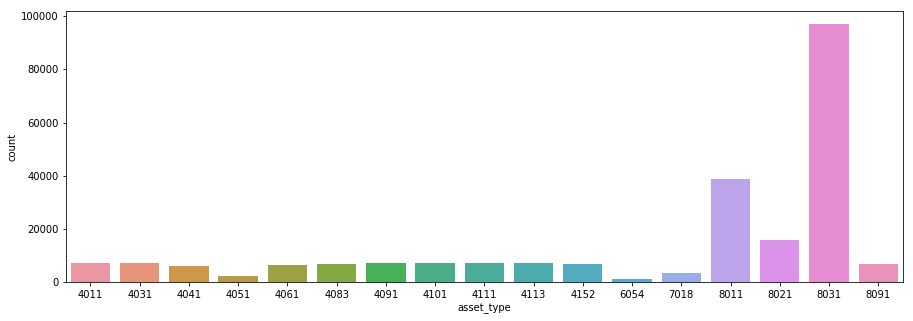

In [221]:
fig = plt.figure(figsize=(15,5))
sns_plot = sns.countplot('asset_type', data = newd)
sns_plot.figure.savefig("AssetType.png")

In [223]:
#

C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


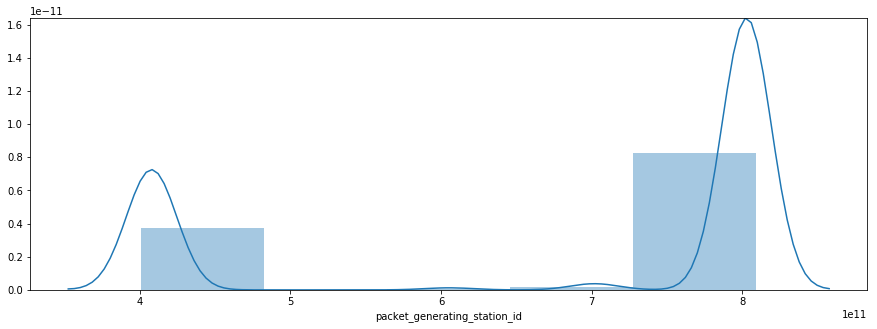

In [225]:
fig = plt.figure(figsize=(15,5))
sns_plot = sns.distplot(newd['packet_generating_station_id'], bins = 5)
sns_plot.figure.savefig("packet_generating_station_id.png")

In [227]:
#

In [228]:
## Draw the map to locate devices

In [229]:
from mpl_toolkits.basemap import Basemap

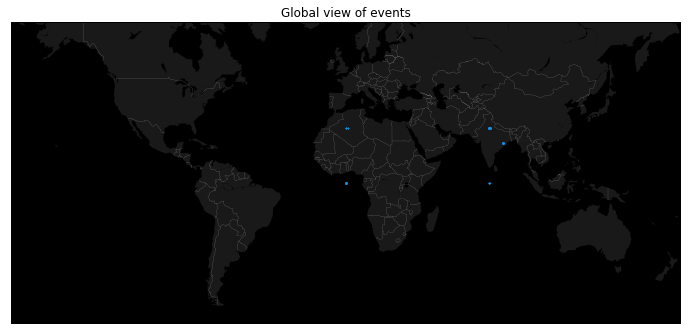

In [71]:

plt.figure(1, figsize=(12,6))

# Mercator of World
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m1(newd["longitude_gps"].tolist(), newd["latitude_gps"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()


In [230]:
#

In [231]:
## change datatype to float
newd['longitude_gps'] = newd['longitude_gps'].astype(float, inplace =True)

In [232]:
## Seperate the dataframe into 2 parts1. with lat long ==0 and latlong !=0

bad_log = newd[newd['longitude_gps']==0]

In [235]:
# Chech how many values does a single lat long has.

In [236]:
newd[newd['longitude_gps']==77.38050842].shape[0]

28

In [237]:
newd[newd['latitude_gps']==28.14421082].shape[0]

51

In [240]:
# Check for duplivates

In [241]:

newd.duplicated().sum()

0

In [242]:
newd[['latitude_gps','longitude_gps']].duplicated().sum()

184518

In [243]:
## There are 78% of duplicated lat/long

In [244]:
newd[['latitude_gps','longitude_gps']].duplicated().sum()/len(newd)

0.7807344534757277

In [245]:
#

In [96]:
newd[newd['supportsite_id']==2]

,track_record_id,status_code,latitude_gps,longitude_gps,device_id_x,asset_type,packet_generating_station_id,track_num1,project_id,supportsite_id,asset_id_project,device_time_stamp
0,59231753,0,0.00000000,0.00000000,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:00:00
1,59231858,0,0.00000000,0.00000000,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:01:00
2,59231969,0,0.00000000,0.00000000,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:02:00
3,59232069,0,0.00000000,0.00000000,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:03:00
4,59232173,0,0.00000000,0.00000000,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:04:00
5,59232274,0,0.00000000,0.00000000,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:05:00
6,59232385,0,0.00000000,0.00000000,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:06:00
7,59232489,0,0.00000000,0.00000000,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:07:00
8,59232588,0,0.00000000,0.00000000,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:08:00
9,59232688,0,0.00000000,0.00000000,1001020218,4111,411100000001,0,2,2,MPV/27,2017-12-13 00:09:00


In [248]:
## We see that there are highly corellated values

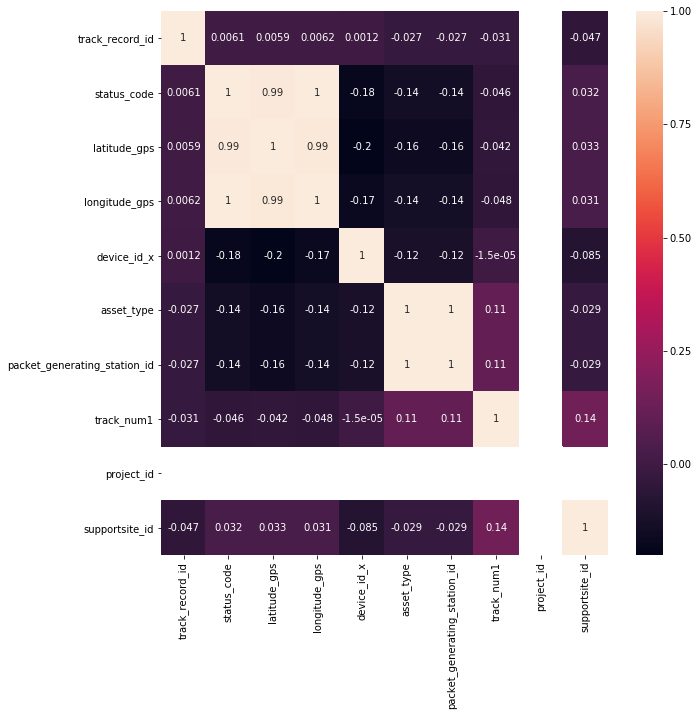

In [314]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(newd.corr(), annot=True)

In [251]:
## We drop the constant and corellated columns
uncorr_data = newd.drop(['packet_generating_station_id', 'project_id'], axis = 1)

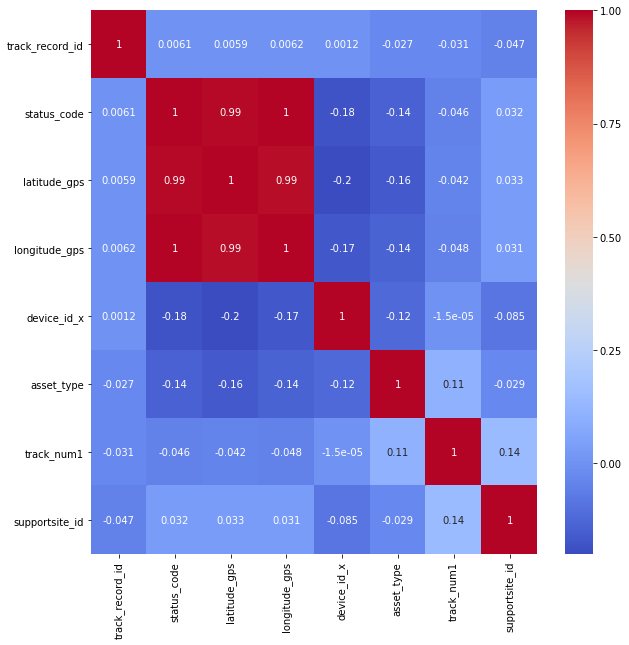

In [252]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(uncorr_data.corr(), cmap='coolwarm', annot=True)

In [253]:
#

In [254]:
## Drop status code also
uncorr_data.drop('status_code', axis = 1, inplace = True)

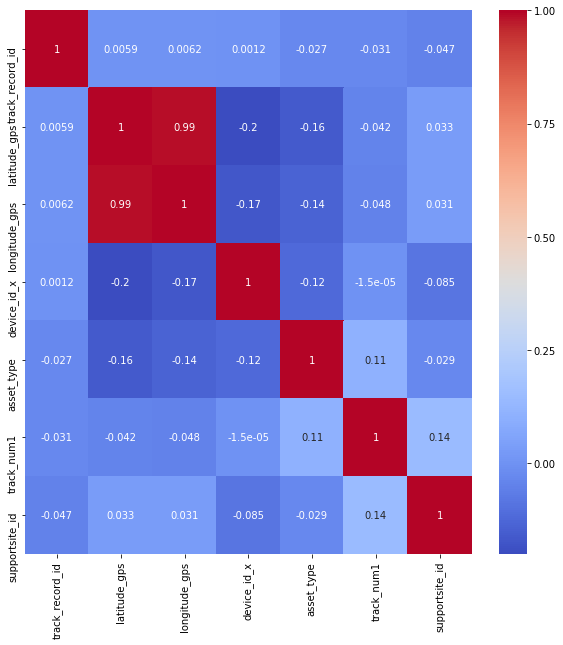

In [255]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(uncorr_data.corr(), cmap='coolwarm', annot=True)

In [256]:
## Remove constant value

In [257]:
uncorr_data.drop('track_record_id', axis = 1, inplace =True)

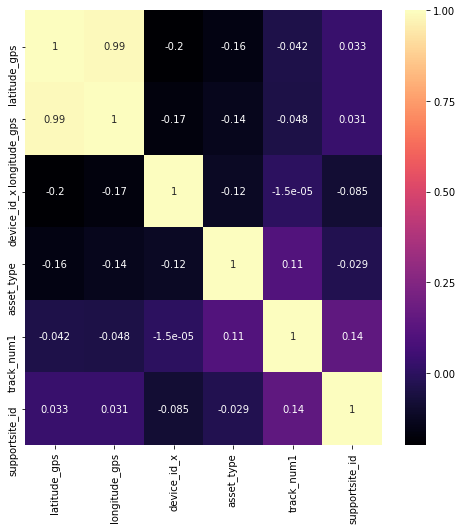

In [259]:
fig = plt.figure(figsize=(8,8))
sns_plot = sns.heatmap(uncorr_data.corr(), cmap='magma', annot = True)
sns_plot.figure.savefig('CorrHeatmap.png')

#### Asset type

In [260]:
## convert Asset type to string
uncorr_data['asset_type'] = uncorr_data['asset_type'].astype(str, inplace =True)

In [261]:
## Slice the column for changing its value

In [262]:
uncorr_data['asset_type'] = uncorr_data['asset_type'].str.slice(0,1)

In [263]:
## Create a copy of data 

In [264]:
newd1 = uncorr_data.copy()

In [265]:
## 4xxx = movable equipment type 1; 6xxx = stationary equipment type 1;  8xxx = movable equipment type 2; 7xxx = stationary equipment type 2

In [266]:
newd1['asset_type']=newd1['asset_type'].map({'4': 'Mov1', '6': 'St1', '8':'Mov2', '7':'St2'})

In [267]:
#

In [268]:
newd1['asset_type'].value_counts()

Mov2    159283
Mov1     72248
St2       3604
St1       1204
Name: asset_type, dtype: int64

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


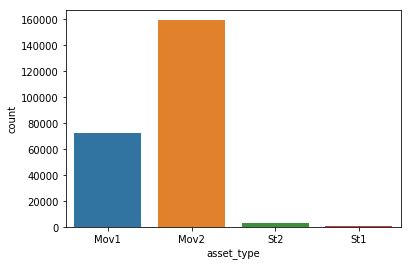

In [269]:
sns_plot = sns.countplot('asset_type', data=newd1)
sns_plot.figure.savefig('AssetType.png')

In [270]:
newd1.asset_type.value_counts()/len(newd1)

Mov2    0.67395986
Mov1    0.30569648
St2     0.01524928
St1     0.00509438
Name: asset_type, dtype: float64

In [271]:
# Percent of stationary devices are very less

In [272]:
#

In [273]:
newd1['year']= newd1['device_time_stamp'].dt.year
newd1['month']= newd1['device_time_stamp'].dt.month
newd1['day']= newd1['device_time_stamp'].dt.day
newd1['hour']= newd1['device_time_stamp'].dt.hour
newd1['minute']= newd1['device_time_stamp'].dt.minute
newd1['second']= newd1['device_time_stamp'].dt.second
newd1['dayOfWeek']= newd1['device_time_stamp'].dt.dayofweek

In [274]:
#

In [275]:
## Remove year, month, second as these are constant values

In [276]:
newd1.drop(['year', 'month', 'second'], axis=1, inplace = True
         )

### When lat/long is zero there are no supportsite id ==3 and there are no type 2 device are avalable, and most of the devices were off

### Fault is independent of day or time

In [277]:
nonZero_lat = newd1[newd1['latitude_gps']!=0]

In [278]:
nonZero_cols=['device_id_x', 'asset_type','track_num1', 'supportsite_id', 'asset_id_project','day', 'hour', 'minute']

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


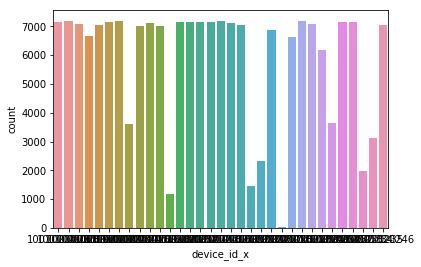

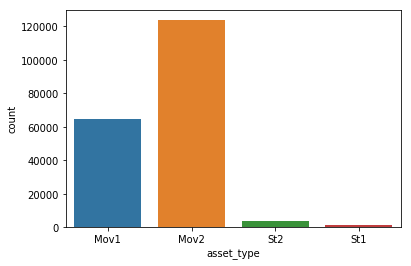

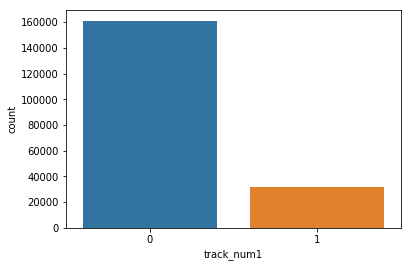

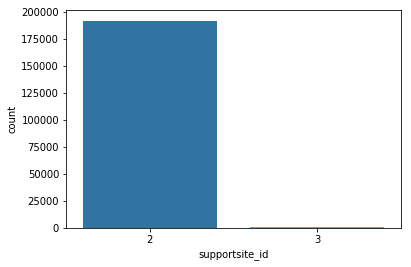

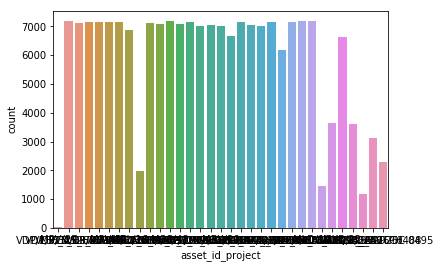

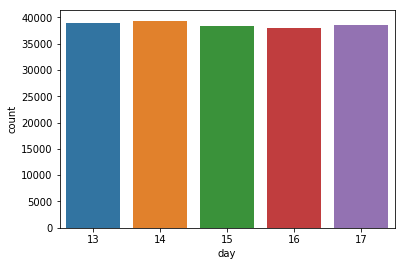

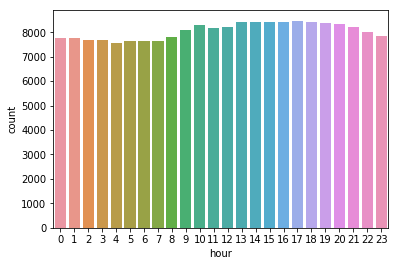

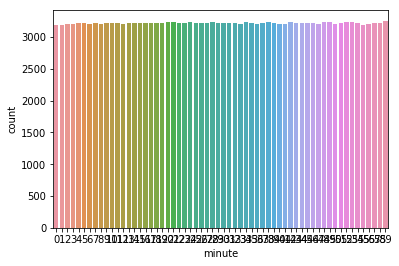

In [279]:
for x in nonZero_cols:
    
    sns.countplot(x, data=nonZero_lat)
    plt.show()

## Calculate the distance locations

In [280]:
def haversine(lat1,lon1,lat2,lon2, to_radians = True, earth_radius =6371):
    if to_radians:
        lat1,lon1,lat2,lon2 = np.radians([lat1,lon1,lat2,lon2])

    a = np.sin((lat2-lat1)/2.0)**2+ np.cos(lat1) * np.cos(lat2) * np.sin((lon2- 
    lon1)/2.0)**2

    return pd.DataFrame(earth_radius *2 * np.arcsin(np.sqrt(a)))


newd1['dist'] = (newd1.groupby(["device_id_x", "track_num1"])
                              .apply(lambda x: haversine(x['latitude_gps'],
                                                         x['longitude_gps'], 
                                                         x['latitude_gps'].shift(),
                                                         x['longitude_gps'].shift())).values)

#if need replace NaNs to 0  
newd1['dist'] = newd1['dist'].fillna(0)

In [282]:
newd1[['device_id_x', 'dist']].tail()

,device_id_x,dist
236338,1001020213,0.15000811
236339,1001020213,0.14031288
236340,1001020213,0.04059136
236341,1001020213,0.12412457
236342,1001020213,0.02534774


In [283]:
## WE see that distance is created

In [149]:
## Make pivot table on day, device and distance, as only these things are needed

In [285]:
DistanceTraveled = newd1.groupby('device_id_x')['dist'].sum().sort_values(ascending=False)
DistanceTraveled.to_csv('DistanceTraveled.csv')

In [286]:
## is there any uniqueness when value supportsite_id is 3 or 2
support3 =newd1[newd1['supportsite_id']==3]
support2 =newd1[newd1['supportsite_id']==2]

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


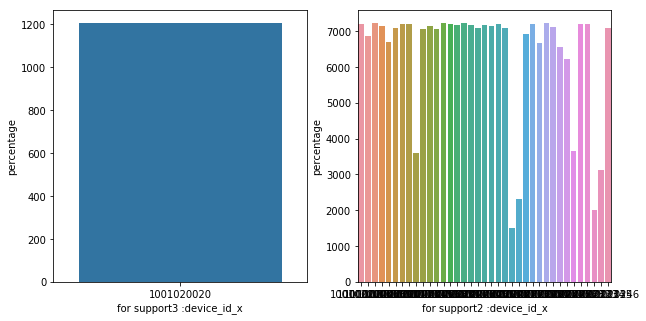

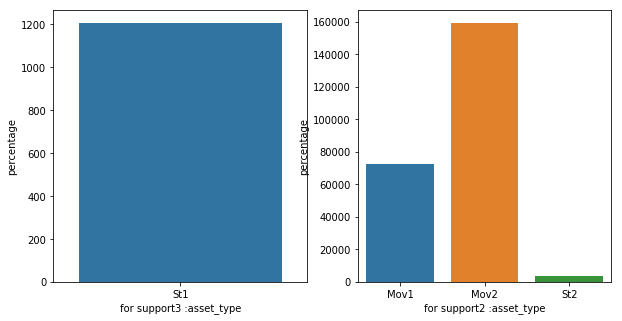

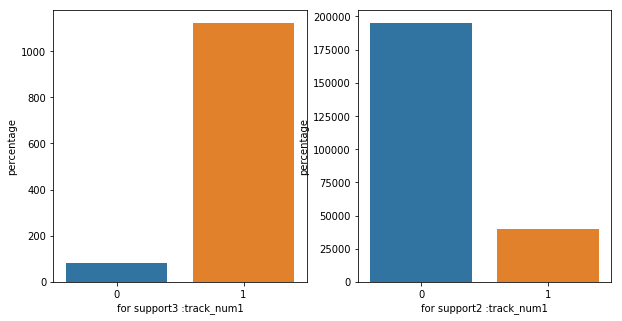

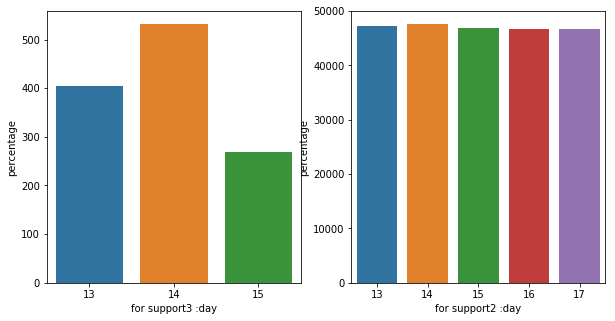

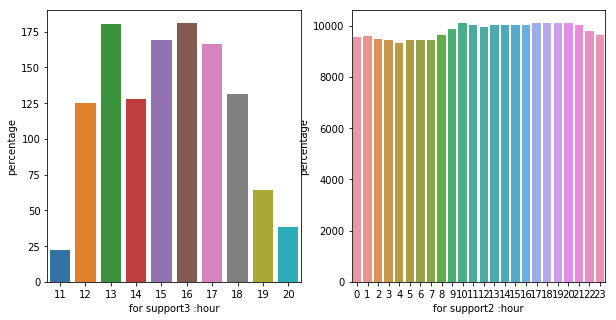

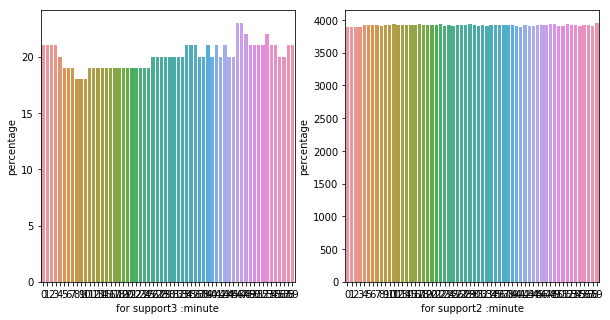

In [289]:
use_cols_siteid = ['device_id_x','asset_type','track_num1','day', 'hour', 'minute' ]
for cols in use_cols_siteid:
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
    fig = plt.figure(figsize=(15,5))
    sns_plot0 = sns.countplot(cols, data = support3, ax=axes[0] )
    sns_plot1 = sns.countplot(cols, data = support2, ax=axes[1])
    

    axes[0].set(xlabel='for support3 :'+cols, ylabel='percentage')
    axes[1].set(xlabel='for support2 :'+cols, ylabel='percentage')
sns_plot0.figure.savefig('support3.png')
sns_plot1.figure.savefig('support2.png')
    

In [290]:
## Device ID is too big, making it short for easy references

In [291]:
newd1['device_id_x']= newd1['device_id_x'].astype(str)

In [292]:
newd1['device_id_x'] = newd1['device_id_x'].str.slice(-3,)

In [293]:
## We have wed to sun values
newd1['device_id_x'].unique()

array(['218', '208', '008', '207', '202', '012', '233', '203', '217',
       '234', '016', '224', '013', '009', '003', '018', '011', '015',
       '010', '232', '246', '211', '201', '226', '023', '206', '205',
       '225', '204', '005', '223', '212', '228', '220', '014', '020',
       '235', '213'], dtype=object)

In [295]:
## Create seperate dataFrames for different days

In [294]:
wed = newd1[newd1['day']==13]
thu = newd1[newd1['day']==14]
fri = newd1[newd1['day']==15]
sat = newd1[newd1['day']==16]
sun = newd1[newd1['day']==17]

## Export them to csv
wed.to_csv('wed.csv')
thu.to_csv('thu.csv')
fri.to_csv('fri.csv')
sat.to_csv('sat.csv')
sun.to_csv('sun.csv')

In [296]:
## Make pivot table with columns as device ID

In [297]:
wed1 = wed.pivot_table(values='dist', index=['hour'], columns='device_id_x',margins=True)

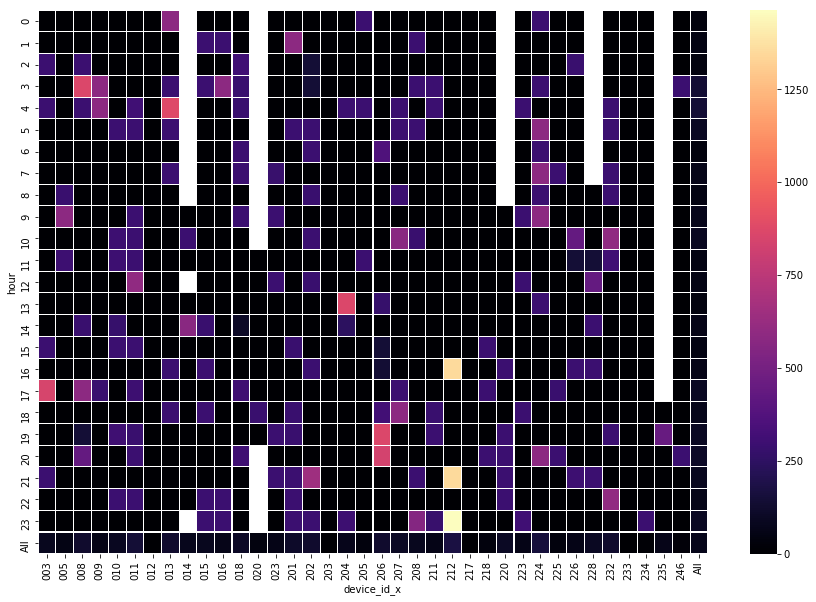

In [308]:
fig = plt.figure(figsize =  (15,10))
sns_plot = sns.heatmap(wed1, cmap ='magma',linecolor='white', linewidths=.1)
sns_plot.figure.savefig('Distance Traveled by Each device on 13.png')

In [302]:
wedT = wed1.T
wedT.drop(['All'], axis=0, inplace = True)
wedT['DistanceTraveled'] = wedT.sum(axis=1)

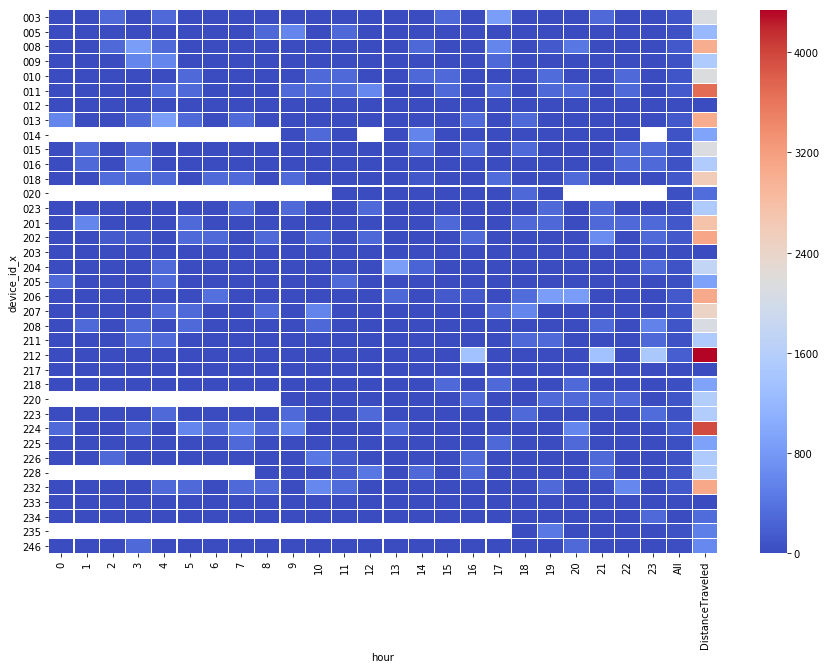

In [309]:
fig = plt.figure(figsize =  (15,10))
san_plot = sns.heatmap(wedT, cmap ='coolwarm',linecolor='white', linewidths=.1)
sns_plot.figure.savefig('Distance Traveled by Each device on 13.png')

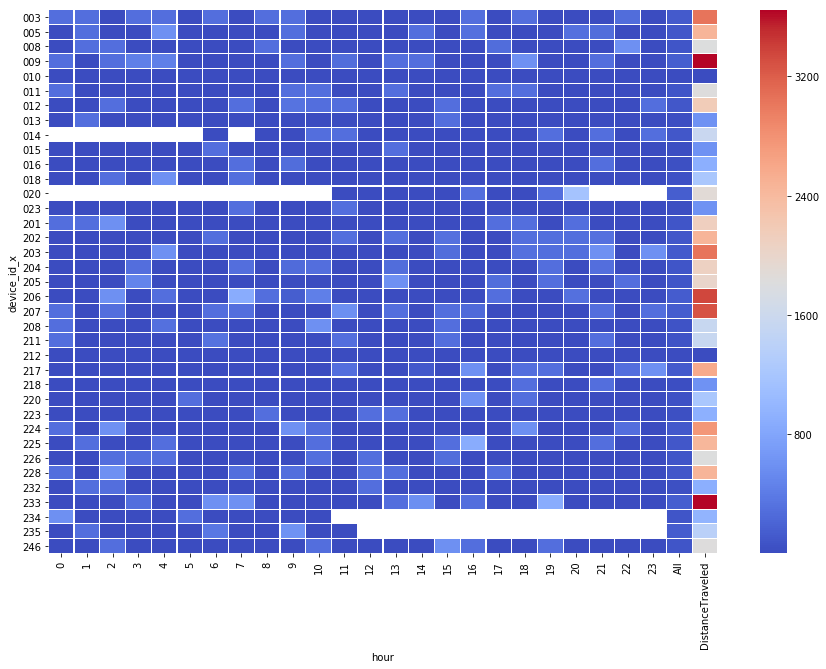

In [310]:
thu1 = thu.pivot_table(values='dist', index=['hour'], columns='device_id_x',margins=True)
thuT = thu1.T
thuT.drop(['All'], axis=0, inplace = True)
thuT['DistanceTraveled'] = thuT.sum(axis=1)

fig = plt.figure(figsize =  (15,10))
sns.heatmap(thuT, cmap ='coolwarm',linecolor='white', linewidths=.1)
sns_plot.figure.savefig('Distance Traveled by Each device on 14.png')

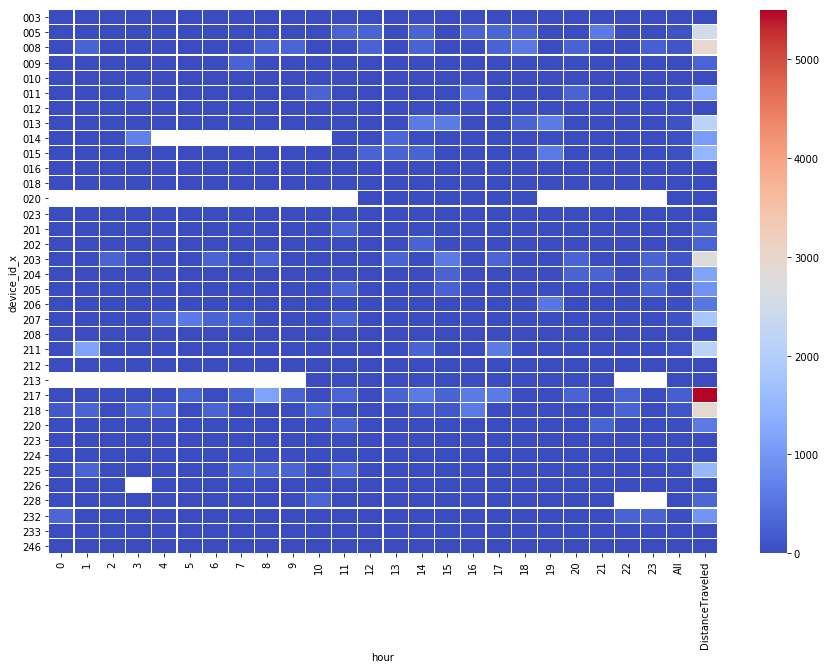

In [311]:
fri1 = fri.pivot_table(values='dist', index=['hour'], columns='device_id_x',margins=True)
friT = fri1.T
friT.drop(['All'], axis=0, inplace = True)
friT['DistanceTraveled'] = friT.sum(axis=1)

fig = plt.figure(figsize =  (15,10))
sns.heatmap(friT, cmap ='coolwarm',linecolor='white', linewidths=.1)
sns_plot.figure.savefig('Distance Traveled by Each device on 15.png')

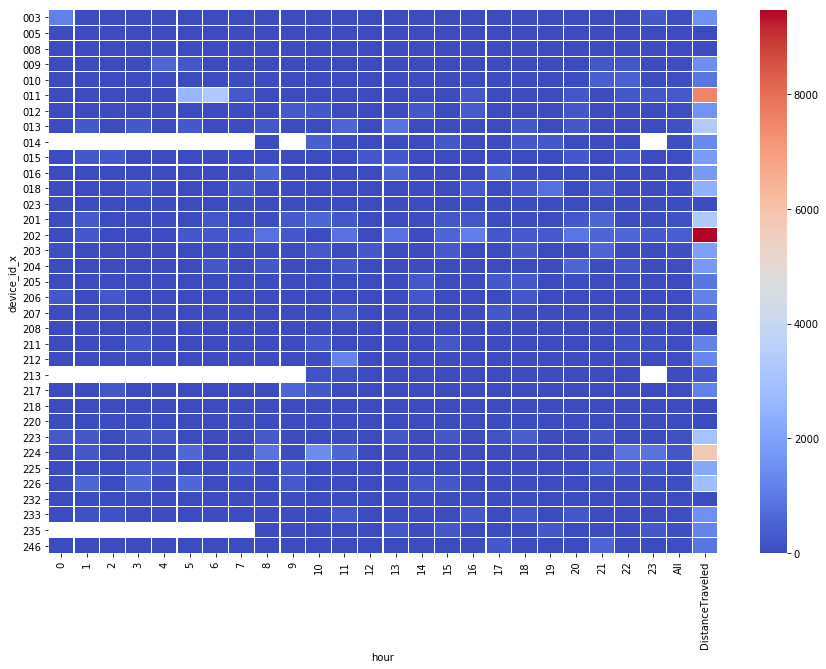

In [312]:
sat1 = sat.pivot_table(values='dist', index=['hour'], columns='device_id_x',margins=True)
satT = sat1.T
satT.drop(['All'], axis=0, inplace = True)
satT['DistanceTraveled'] = satT.sum(axis=1)

fig = plt.figure(figsize =  (15,10))
sns.heatmap(satT, cmap ='coolwarm',linecolor='white', linewidths=.1)
sns_plot.figure.savefig('Distance Traveled by Each device on 16.png')

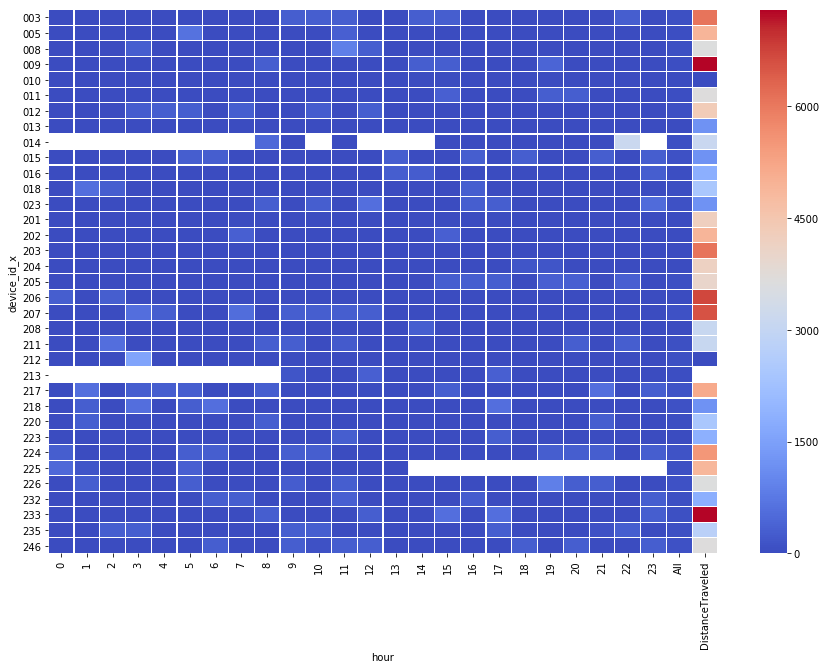

In [313]:
sun1 = sun.pivot_table(values='dist', index=['hour'], columns='device_id_x',margins=True)
sunT = sun1.T
sunT.drop(['All'], axis=0, inplace = True)
sunT['DistanceTraveled'] = thuT.sum(axis=1)

fig = plt.figure(figsize =  (15,10))
sns.heatmap(sunT, cmap ='coolwarm',linecolor='white', linewidths=.1)
sns_plot.figure.savefig('Distance Traveled by Each device on 17.png')